In [111]:
import pandas as pd
import os

In [112]:
print(os.getcwd())

C:\Users\USER\Desktop\class\Python\03.Data Science\data


In [113]:
os.chdir('./data')

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다: './data'

In [ ]:
# 실습 예제 : 월별분석 폴더내부의 4월 / 5월 / 6월의 데이터를 불러와 하나로 만들어주자
# 1. 파일의 이름 확인하기
# os.listdir() :
os.listdir()

In [ ]:
file_name = os.listdir('./월별급여')

In [ ]:
file_name

In [ ]:
# 반복문을 사용해서 전체 데이터를 가져오기
pay_df_list = []
for fn in file_name[1:] :
    df = pd.read_csv('./월별급여/' + fn, encoding= 'euc-kr')
    pay_df_list.append(df)

In [ ]:
# 데이터 프레임 병합(concat())
total_df = pd.concat(pay_df_list)
total_df

In [ ]:
# csv 파일 저장
total_df.to_csv('./total_pay_info.csv', index = False)

In [ ]:
# 240814(1)

### org_info 데이터 확인해보기
- 조직 정보 데이터
- 조직 정보 데이터에 각 조직별 인원 수, 평균 나이, 평균 근무 년수, 평균 연봉을 추가해보자.

In [ ]:
# 조직정보데이터 불러오기
org_info = pd.read_csv('./org-info.csv', encoding = 'euc-kr')
org_info

In [ ]:
# 조직별 인원수, 평균나이, 평균 근무년수, 평균 연봉을 다른 데이터에서 추출해보자
# hr_info
hr_info = pd.read_csv('./hr-info.csv', encoding= 'euc-kr')
hr_info

In [ ]:
# 데이터 준비
# 자 : 딕셔너리 통해 각 컬럼마다 다른 연산 진행 가능
org_agg = hr_info.groupby(by = "ORG_CD").agg({"ENAME" : 'count',
                                             "AGE" : "mean",
                                             "SERVICE_YEAR" : 'mean',
                                             'SALARY' : 'mean'})

org_agg

In [ ]:
# 병합할 데이터 프레임의 인덱스 구조 확인
org_info.index

In [ ]:
org_agg.index

In [ ]:
# org_info와 우리가 추출한 org_agg 데이터 프레임을 병합해주자
# 병합 방향은 가로로 병합해야 한다.
# 주의사항 : concat 을 이용한 병합을 진행 시 각 데이터프레임의 인덱스를 같게 맞춰줘야 올바른 병합이 일어난다.

org_info_new = pd.concat([org_info, org_agg], axis=1) # axis : 병합 방향 결정 ( 0 : 세로, 1 : 가로)
org_info_new

### merge에 대해 알아보자
- 공통된 컬럼을 기준으로 양쪽의 데이터를 병합할 때 사용
- 데이터베이스의 조인 개념을 떠올리면 좋다.(inner, outer, left, right)
- 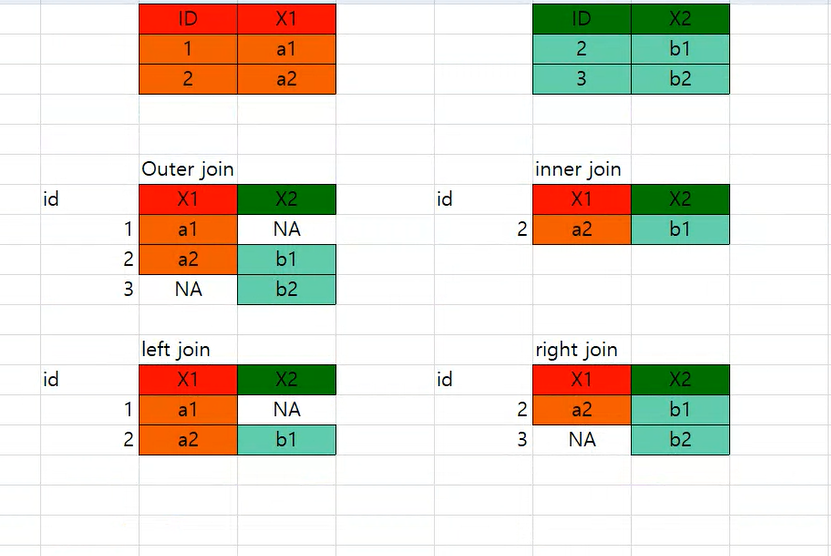
  

In [124]:
# 급여 지급 내역 데이터로딩
hr_pay_info = pd.read_csv("./hr-pay-info.csv", encoding='euc-kr')
hr_pay_info

,EID,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,20240601,월급,850
1,E00181,20240601,월급,791
2,E00164,20240601,월급,758
3,E00190,20240601,월급,708
4,E00209,20240601,월급,716
...,...,...,...,...
750,E00322,20240401,상여금,300
751,E00389,20240401,상여금,300
752,E00438,20240401,상여금,300
753,E00304,20240401,상여금,300


In [134]:
# 데이터의 수를 체크
print(hr_info.shape) # (200, 20)
print(hr_pay_info.shape) # (755, 4)

(200, 20)
(755, 4)


In [138]:
# 240814(2)
hr_info.columns

Index(['EID', 'ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'SALARY', 'LAST_PROMO_DT',
       'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE', 'HIRE_DATE', 'RETIRE_DATE',
       'RETIRE_REASON', 'REHIRE_YN', 'NATION', 'ROUNDING_DEDUCTION'],
      dtype='object')

In [140]:
hr_pay_info.columns

Index(['EID', 'PAYMENT_DY', 'PAYMENT_DVCD', 'PAYMENT_AMOUNT'], dtype='object')

In [146]:
# 공통적으로 가지고 있는 EID라는 데이터를 중심으로 merge
# 구성원 정보에서 사용할 EID, 이름, 성별 추출

hr_info_df = hr_info[['EID','ENAME', 'GENDER']]
hr_info_df

,EID,ENAME,GENDER
0,E00206,시이오,M
1,E00181,나사장,F
2,E00164,난부사장,M
3,E00190,판라다,F
4,E00209,누훈봉,M
...,...,...,...
195,E00322,부탐회,F
196,E00389,초두반,F
197,E00438,권개득,M
198,E00304,탐출조,M


In [148]:
print(hr_info_df.shape)

(200, 3)


In [178]:
# 조직원 구성 정보를 이용해서 merge 진행
total_salary_df1 = pd.merge(hr_info_df, hr_pay_info, how = 'left', on = 'EID')
total_salary_df1

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601.0,월급,850.0
1,E00206,시이오,M,20240501.0,월급,850.0
2,E00206,시이오,M,20240401.0,월급,850.0
3,E00206,시이오,M,20240401.0,성과급,425.0
4,E00206,시이오,M,20240401.0,상여금,300.0
...,...,...,...,...,...,...
799,E00428,을충나,F,20240601.0,월급,375.0
800,E00428,을충나,F,20240501.0,월급,375.0
801,E00428,을충나,F,20240401.0,월급,375.0
802,E00428,을충나,F,20240401.0,성과급,188.0


In [176]:
# 급여지급내용을 이용해서 merge 진행
total_salary_df2 = pd.merge(hr_info_df, hr_pay_info, how = 'right', on = 'EID')
total_salary_df2

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
0,E00206,시이오,M,20240601,월급,850
1,E00181,나사장,F,20240601,월급,791
2,E00164,난부사장,M,20240601,월급,758
3,E00190,판라다,F,20240601,월급,708
4,E00209,누훈봉,M,20240601,월급,716
...,...,...,...,...,...,...
750,E00322,부탐회,F,20240401,상여금,300
751,E00389,초두반,F,20240401,상여금,300
752,E00438,권개득,M,20240401,상여금,300
753,E00304,탐출조,M,20240401,상여금,300


In [164]:
# 200명 중에서 급여 지급 내역이 없는 사람들을 살펴보자
# 데이터 확인하기
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EID                 200 non-null    object 
 1   ENAME               200 non-null    object 
 2   GENDER              200 non-null    object 
 3   ORG_CD              197 non-null    object 
 4   POS_CD              200 non-null    object 
 5   AGE                 200 non-null    int64  
 6   SERVICE_YEAR        200 non-null    int64  
 7   EDU_LEVEL           200 non-null    object 
 8   PERFORMANCE_SCORE   200 non-null    float64
 9   SALARY              200 non-null    int64  
 10  LAST_PROMO_DT       182 non-null    object 
 11  TRAINING_HOURS      200 non-null    int64  
 12  SKILLS              200 non-null    object 
 13  ACTIVE_STATE        200 non-null    object 
 14  HIRE_DATE           200 non-null    object 
 15  RETIRE_DATE         49 non-null     object 
 16  RETIRE_R

In [182]:
# 지급 날짜를 이용해서 지급내역이 없는 사람들을 체크해보자
no_money = total_salary_df1[total_salary_df1['PAYMENT_DY'].isnull() ]
no_money

,EID,ENAME,GENDER,PAYMENT_DY,PAYMENT_DVCD,PAYMENT_AMOUNT
80,E00207,초디소,M,NaN,NaN,NaN
86,E00239,헌란처,M,NaN,NaN,NaN
102,E00323,묵단언,F,NaN,NaN,NaN
108,E00394,우전회,F,NaN,NaN,NaN
119,E00174,탐선반,M,NaN,NaN,NaN
150,E00274,민남무,M,NaN,NaN,NaN
181,E00334,무공담,M,NaN,NaN,NaN
182,E00445,속묵우,M,NaN,NaN,NaN
203,E00283,도온강,F,NaN,NaN,NaN
204,E00312,장춘란,F,NaN,NaN,NaN


In [184]:
no_money.shape # (49, 6)


(49, 6)

In [188]:
# 지급 내역이 없는 사람들이 언제 퇴사했는지 살펴보자
pd.merge(no_money, hr_info)[['ENAME', 'RETIRE_DATE']]

,ENAME,RETIRE_DATE
0,초디소,2022-02-28
1,헌란처,2023-02-28
2,묵단언,2023-02-28
3,우전회,2024-02-29
4,탐선반,2024-02-29
5,민남무,2024-02-29
6,무공담,2024-02-29
7,속묵우,2024-02-29
8,도온강,2024-02-29
9,장춘란,2024-02-29


### 정렬
**sort**
- sort_index : 인덱스를 기준으로 정렬하는 함수 > df.sort_index()
- sort_values : 값을 기준으로 정렬하는 함수 > df.sort_values(by = '기준 컬럼명')


In [193]:
# 인덱스 기준으로 정렬
hr_info.sort_index()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [197]:
# 인덱스 지정 후 정렬
# set_index(): 지정한 컬럼을 인덱스로 설정해주세요
hr_info.set_index("EID").sort_index()

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00163,득치패,M,ORG013,P008,28,0,학사 학위,0.00,5000,2024-03-01,4,"Project Management, Salesforce, Java",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00165,내감반,M,ORG006,P008,24,0,학사 학위,0.00,5000,2024-03-01,4,"Python, Data Analysis",Y,2024-03-01,NaN,NaN,NaN,KOREA,Y
E00167,명묵말,M,ORG013,P005,42,12,석사 학위,3.88,7300,2024-03-01,46,Salesforce,Y,2012-03-01,NaN,NaN,NaN,KOREA,Y
E00168,인환숙,M,ORG025,P007,30,1,학사 학위,4.18,5600,2024-03-01,60,Data Analysis,N,2023-03-01,2024-03-01,이직,N,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00494,탄배매,F,ORG030,P007,30,1,학사 학위,3.67,5600,2024-03-01,49,"Salesforce, Java, Marketing",N,2023-03-01,2024-03-01,건강 문제,N,India,Y
E00495,충창동,F,ORG017,P007,30,1,학사 학위,1.92,5600,2024-03-01,59,"Marketing, Project Management, Data Analysis",N,2023-03-01,2024-03-01,이직,N,UK,Y
E00496,우봉망,F,ORG002,P006,35,7,학사 학위,1.20,6700,2024-03-01,62,"Project Management, Marketing",Y,2017-03-01,NaN,NaN,NaN,USA,Y


In [201]:
# 컬럼 기준 정렬
# 함수 > sort_index() : 존재 O / sort_columns() : 존재 
# 컬럼명도 인덱스처럼 생각해보자
hr_info.sort_index(axis = 1)

,ACTIVE_STATE,AGE,EDU_LEVEL,EID,ENAME,GENDER,HIRE_DATE,LAST_PROMO_DT,NATION,ORG_CD,PERFORMANCE_SCORE,POS_CD,REHIRE_YN,RETIRE_DATE,RETIRE_REASON,ROUNDING_DEDUCTION,SALARY,SERVICE_YEAR,SKILLS,TRAINING_HOURS
0,Y,49,박사 학위,E00206,시이오,M,1999-03-01,2024-03-01,KOREA,NaN,4.50,P001,NaN,NaN,NaN,Y,10200,25,"Marketing, Salesforce",240
1,Y,49,박사 학위,E00181,나사장,F,2000-03-01,2024-03-01,KOREA,NaN,4.60,P002,NaN,NaN,NaN,Y,9500,24,"Project Management, Marketing",236
2,Y,48,박사 학위,E00164,난부사장,M,2002-03-01,2024-03-01,KOREA,NaN,4.60,P003,NaN,NaN,NaN,Y,9100,22,"Salesforce, Data Analysis, Java",240
3,Y,47,박사 학위,E00190,판라다,F,2006-03-01,2024-03-01,KOREA,ORG007,3.51,P004,NaN,NaN,NaN,Y,8500,18,"Java, Data Analysis, Salesforce",96
4,Y,47,박사 학위,E00209,누훈봉,M,2005-03-01,2023-03-01,KOREA,ORG023,3.38,P004,NaN,NaN,NaN,Y,8600,19,"Java, Salesforce",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Y,23,학사 학위,E00322,부탐회,F,2024-09-01,NaN,KOREA,ORG014,0.00,P009,NaN,NaN,NaN,N,4500,0,Java,4
196,Y,23,학사 학위,E00389,초두반,F,2024-09-01,NaN,KOREA,ORG012,0.00,P009,NaN,NaN,NaN,N,4500,0,"Salesforce, Java",4
197,Y,23,학사 학위,E00438,권개득,M,2024-09-01,NaN,KOREA,ORG024,0.00,P009,NaN,NaN,NaN,N,4500,0,Python,4
198,Y,24,학사 학위,E00304,탐출조,M,2024-09-01,NaN,KOREA,ORG009,0.00,P009,NaN,NaN,NaN,N,4500,0,Salesforce,4


In [205]:
# 값을 기준으로 정렬(연봉)
# hr_info.sort_values(by = 'SALARY')
hr_info.sort_values(by = 'SALARY', ascending= False)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
7,E00487,고명초,F,ORG014,P004,47,20,석사 학위,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N


In [207]:
# 두 가지 기준으로 정렬하기(나이, 연봉)
hr_info.sort_values(by = ['AGE', 'SALARY'])

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
182,E00183,용조담,F,ORG023,P009,22,0,학사 학위,0.00,4500,NaN,4,"Python, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
183,E00192,감옥신,F,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Project Management, Python, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
184,E00275,복판백,M,ORG017,P009,22,0,학사 학위,0.00,4500,NaN,4,"Marketing, Salesforce",N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
10,E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [211]:
# 240814(3)

In [209]:
hr_info
# 파이썬 > 주로 데이터 핸들링에 많이 사용된다.
# 데이터가 즉각적으로 바뀌면 데이터 오염이 쉽게 일어날 수 있다.
# 그래서 확인 차 변경된 결과를 우선적으로 보여준다. > 기회를 한 번 더준다!

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
196,E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
197,E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [219]:
# 정렬된 값을 원본 데이터에 바로 적용시키기
# inplace = False : 원본데이터에 변경사항 미적용(보여주기만 한다.)
# inplace = True : 원본데이터에 변경사항 적용(실제로 데이터 변경이 일어난다.)
hr_info.sort_values(by='AGE', ascending = False, inplace= True)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N


### rank

In [230]:
# 낮은 값을 가지고 있을수록 숫자가 1에 가까워진다.
org_info_new['SALARY'].rank()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
ORG001     2.0
ORG002    28.0
ORG003    26.0
ORG004    25.0
ORG005     8.0
ORG006    15.0
ORG007    30.0
ORG008    16.0
ORG009     6.5
ORG010    23.0
ORG011    29.0
ORG012    11.0
ORG013    14.0
ORG014    17.5
ORG015     1.0
ORG016    27.0
ORG017     6.5
ORG018    12.0
ORG019     5.0
ORG020     3.0
ORG021    24.0
ORG022    17.5
ORG023    10.0
ORG024    13.0
ORG025    20.0
ORG026     4.0
ORG027    21.0
ORG028    19.0
ORG029    22.0
ORG030     9.0
Name: SALARY, dtype: float64

In [228]:
org_info_new['SALARY']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
5                 NaN
6                 NaN
7                 NaN
8                 NaN
9                 NaN
10                NaN
11                NaN
12                NaN
13                NaN
14                NaN
15                NaN
16                NaN
17                NaN
18                NaN
19                NaN
20                NaN
21                NaN
22                NaN
23                NaN
24                NaN
25                NaN
26                NaN
27                NaN
28                NaN
29                NaN
ORG001    5033.333333
ORG002    6550.000000
ORG003    6480.000000
ORG004    6445.454545
ORG005    5525.000000
ORG006    5966.666667
ORG007    6728.571429
ORG008    6020.000000
ORG009    5520.000000
ORG010    6300.000000
ORG011    6660.000000
ORG012    5680.000000
ORG013    5950.000000
ORG014    6025.000000
ORG015    5000.000000
ORG016    

In [242]:
# 내림차순으로 랭킹을 매겨보자
org_info_new['SALARY_RANK'] = org_info_new['SALARY'].rank(ascending=False)
org_info_new.head(10)

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role,ENAME,AGE,SERVICE_YEAR,SALARY,SALARY_RANK
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.,NaN,NaN,NaN,NaN,NaN
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다.",NaN,NaN,NaN,NaN,NaN
2,ORG003,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.,NaN,NaN,NaN,NaN,NaN
3,ORG004,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Core Development Team,webOS 핵심 개발 팀,webOS 플랫폼의 핵심 기능 개발 및 유지보수를 담당합니다.,NaN,NaN,NaN,NaN,NaN
4,ORG005,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS User Interface Team,webOS 사용자 인터페이스 팀,webOS의 사용자 인터페이스 디자인 및 개선을 담당합니다.,NaN,NaN,NaN,NaN,NaN
5,ORG006,Home Entertainment Division,HE사업본부,webOS Software Development Department,webOS SW개발그룹,webOS Quality Assurance Team,webOS 품질 보증 팀,webOS 소프트웨어의 품질 검증 및 테스트를 수행합니다.,NaN,NaN,NaN,NaN,NaN
6,ORG007,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다.",NaN,NaN,NaN,NaN,NaN
7,ORG008,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Key Account Management Team,주요 고객 관리 팀,"주요 고객과의 관계를 관리하고, 맞춤형 솔루션을 제공합니다.",NaN,NaN,NaN,NaN,NaN
8,ORG009,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을...",NaN,NaN,NaN,NaN,NaN
9,ORG010,Vehicle Solutions Division,VS사업본부,VS Asia Sales/PM Department,VS아시아영업/PM담당,Asia Regional Sales Team,아시아 지역 판매 팀,"아시아 지역에서의 판매 활동을 관리하고, 시장 진입 전략을 수립합니다.",NaN,NaN,NaN,NaN,NaN


### 재구조화

**pivot**
- df.pivot(index='컬럼명', columns='컬럼명', values='컬럼명')

In [249]:
# 4~6월까지 각 사람별로 지급된 급여를 컬럼으로 정리하고 싶어요!
# 1. 월급 데이터 -> 불리언 인덱싱 진행
hr_pay_info['PAYMENT_DVCD'].unique()

array(['월급', '성과급', '상여금'], dtype=object)

In [256]:
hr_pay_info_df= hr_pay_info[hr_pay_info['PAYMENT_DVCD']=='월급'][['EID','PAYMENT_DY', 'PAYMENT_AMOUNT']]
hr_pay_info_df

,EID,PAYMENT_DY,PAYMENT_AMOUNT
0,E00206,20240601,850
1,E00181,20240601,791
2,E00164,20240601,758
3,E00190,20240601,708
4,E00209,20240601,716
...,...,...,...
448,E00322,20240401,375
449,E00389,20240401,375
450,E00438,20240401,375
451,E00304,20240401,375


In [258]:
# 피봇 테이블 만들기
hr_pay_info_df

,EID,PAYMENT_DY,PAYMENT_AMOUNT
0,E00206,20240601,850
1,E00181,20240601,791
2,E00164,20240601,758
3,E00190,20240601,708
4,E00209,20240601,716
...,...,...,...
448,E00322,20240401,375
449,E00389,20240401,375
450,E00438,20240401,375
451,E00304,20240401,375


In [262]:
#2. 피봇 테이블 만들기
hr_pay_info_pivot= hr_pay_info_df.pivot(index='EID', columns ='PAYMENT_DY', values='PAYMENT_AMOUNT')
hr_pay_info_pivot

PAYMENT_DY,20240401,20240501,20240601
EID,,,
E00163,417,417,417
E00164,758,758,758
E00165,416,416,416
E00167,608,608,608
E00169,708,708,708
...,...,...,...
E00487,716,716,716
E00491,575,575,575
E00496,558,558,558


### melt
- df.melt(id_vars = '컬럼명', value_vars = ['컬럼명', '컬럼명'])

In [267]:
# 인덱스를 초기화
hr_pay_info_pivot.reset_index()

PAYMENT_DY,EID,20240401,20240501,20240601
0,E00163,417,417,417
1,E00164,758,758,758
2,E00165,416,416,416
3,E00167,608,608,608
4,E00169,708,708,708
...,...,...,...,...
146,E00487,716,716,716
147,E00491,575,575,575
148,E00496,558,558,558
149,E00497,566,566,566


In [279]:
# 컬럼명을 값으로 바꿔서 아래로 데이터를 줄세우자!
# id_vars = 기준 컬럼
hr_pay_info_pivot.reset_index().melt(id_vars='EID', value_vars = [20240401, 20240501, 20240601])

,EID,PAYMENT_DY,value
0,E00163,20240401,417
1,E00164,20240401,758
2,E00165,20240401,416
3,E00167,20240401,608
4,E00169,20240401,708
...,...,...,...
448,E00487,20240601,716
449,E00491,20240601,575
450,E00496,20240601,558
451,E00497,20240601,566


### 데이터 처리

**apply**
- 사용자 정의 함수를 이용해서 행 단위 또는 열 단위로 직접 작성한 알고리즘을 적용하는 기능

In [316]:
# skill에 따라 능력치 점수를 만들어보자
# 프로그램스킬 1점
# 데이터분석스킬 2점

def skill(row) :
    point = 0
    if 'Java' in row['SKILLS'] or 'Python' in row['SKILLS'] :
        point += 1
    if 'Data Analysis' in row['SKILLS']:
        point += 2
    return point
    

In [318]:
hr_info['SKILL_POINT'] = hr_info.apply(skill, axis=1)
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,SKILL_POINT
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,0
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,3
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,...,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,3
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,...,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y,3
12,E00346,루신디,F,ORG011,P004,48,19,석사 학위,1.25,8500,...,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,...,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,...,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,1
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,...,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,0
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,...,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N,1


### 데이터 삭제

In [298]:
# 행삭제
hr_info.drop(1)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N


In [302]:
hr_info
# 놓침

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
14,E00474,규아래,M,ORG016,P004,48,18,학사 학위,2.19,8300,2024-03-01,44,Python,Y,2006-03-01,NaN,NaN,NaN,India,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N


In [310]:
# 여러개의 행 삭제
hr_info.drop([1,14,21], axis =0, inplace = True)

In [312]:
hr_info

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
13,E00411,구류길,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
12,E00346,루신디,F,ORG011,P004,48,19,석사 학위,1.25,8500,2023-03-01,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,탐말당,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,랑화구,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,빈태봉,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N


In [314]:
# 열 삭제
hr_info.drop('ENAME', axis = 1)

,EID,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
8,E00169,M,ORG004,P004,48,20,학사 학위,3.90,8500,2022-03-01,32,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y
13,E00411,M,ORG004,P004,48,18,박사 학위,4.87,8500,2024-03-01,37,"Data Analysis, Java, Python",Y,2006-03-01,NaN,NaN,NaN,USA,Y
12,E00346,F,ORG011,P004,48,19,석사 학위,1.25,8500,2023-03-01,83,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,E00315,F,ORG019,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,"Project Management, Java, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
187,E00303,M,ORG030,P009,22,0,학사 학위,0.00,4500,NaN,4,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
186,E00300,F,ORG001,P009,22,0,학사 학위,0.00,4500,NaN,4,Marketing,Y,2024-03-01,NaN,NaN,NaN,KOREA,N
185,E00281,F,ORG021,P009,22,0,고등학교 졸업,0.00,4500,NaN,4,Java,N,2024-03-01,2024-02-28,계약만료,N,KOREA,N
